In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , Dropout , BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint, CSVLogger

import tensorflow as tf

import pickle

from sklearn.metrics import classification_report,confusion_matrix

In [6]:
datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train = datagen.flow_from_directory('/Users/faizahkureshi/Desktop/Capstone Project/DataSet 2/train', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate validation dataset
val = datagen.flow_from_directory('/Users/faizahkureshi/Desktop/Capstone Project/DataSet 2/val', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate test dataset
test = datagen.flow_from_directory('/Users/faizahkureshi/Desktop/Capstone Project/DataSet 2/test', target_size=(224, 224), class_mode='binary', batch_size=64)

Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.


In [8]:
imgs, labels = next(train)

In [9]:
imgs.shape

(64, 224, 224, 3)

In [10]:
train.class_indices

{'Benign': 0, 'Malignant': 1}

1.0


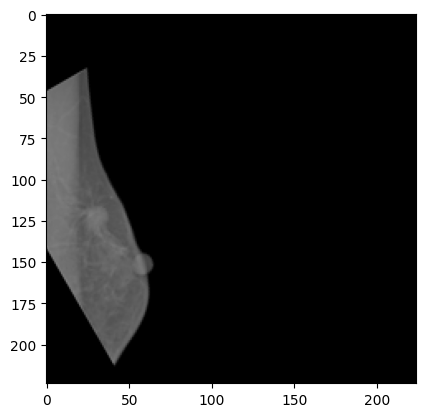

In [11]:
plt.imshow(imgs[0])
print(labels[0])

In [85]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [86]:

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,797,665 (10.67 MB)

 Trainable params: 2,797,665 (10.67 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n//val.batch_size

In [88]:
csv_logger = CSVLogger('/Users/faizahkureshi/Desktop/Capstone Project/training.log', separator=',', append=False)

In [89]:
history = model.fit(train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=5,
                    callbacks=[csv_logger]) 
model.save('/Users/faizahkureshi/Desktop/Capstone Project/first_model.h5')

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 50s 833ms/step - accuracy: 0.6557 - loss: 0.6635 - val_accuracy: 0.6708 - val_loss: 0.6322
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7031 - loss: 0.3051 - val_accuracy: 0.6346 - val_loss: 0.3271
Epoch 3/5


2024-03-23 13:54:46.501210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/faizahkureshi/anaconda3/envs/myenv/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-23 13:54:46.657993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


59/59 ━━━━━━━━━━━━━━━━━━━━ 46s 766ms/step - accuracy: 0.6752 - loss: 0.6313 - val_accuracy: 0.6686 - val_loss: 0.6308
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6406 - loss: 0.3337 - val_accuracy: 0.7115 - val_loss: 0.3045
Epoch 5/5


2024-03-23 13:55:32.978196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-23 13:55:33.123640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


59/59 ━━━━━━━━━━━━━━━━━━━━ 45s 760ms/step - accuracy: 0.6694 - loss: 0.6225 - val_accuracy: 0.6692 - val_loss: 0.6180


***LRP***

In [22]:
from PIL import Image
import numpy as np
user_image_path = r'/Users/faizahkureshi/Desktop/Capstone Project/DataSet 2/train/Malignant/20586934 (17).png'
img = Image.open(user_image_path)
img = img.resize((224, 224))  # Resize to match the model's input size

# Convert the image to RGB format if it's grayscale
if img.mode != 'RGB':
    img = img.convert('RGB')

img = np.array(img)  # Convert to NumPy array
img = img / 255.0  # Normalize the image
og_image=img
#print(og_image.shape)
    # Add batch dimension to the image
img = np.expand_dims(img, axis=0)
# img.shape

In [24]:
from keras.models import load_model,Model

import matplotlib.pyplot as plt
import numpy as np

model=load_model(r"/Users/faizahkureshi/Desktop/Capstone Project/first_model.h5")
last_conv_layer=model.get_layer('conv2d_2')

In [25]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import copy
import pandas as pd 


In [59]:
def new_layer(layer, g):
    """Clone a layer and pass its parameters through the function g."""
    layer = copy.deepcopy(layer)
    try: layer.weight = torch.nn.Parameter(g(layer.weight))
    except AttributeError: pass
    try: layer.bias = torch.nn.Parameter(g(layer.bias))
    except AttributeError: pass
    return layer

def dense_to_conv(layers):
    """ Converts a dense layer to a conv layer """
    newlayers = []
    for i,layer in enumerate(layers):
        if isinstance(layer, nn.Linear):
            newlayer = None
            if i == 0:
                m, n = 512, layer.weight.shape[0]
                newlayer = nn.Conv2d(m,n,7)
                newlayer.weight = nn.Parameter(layer.weight.reshape(n,m,7,7))
            else:
                m,n = layer.weight.shape[1],layer.weight.shape[0]
                newlayer = nn.Conv2d(m,n,1)
                newlayer.weight = nn.Parameter(layer.weight.reshape(n,m,1,1))
            newlayer.bias = nn.Parameter(layer.bias)
            newlayers += [newlayer]
        else:
            newlayers += [layer]
    return newlayers

def get_linear_layer_indices(model):
    offset = len(model._modules['features']) + 1
    indices = []
    for i, layer in enumerate(model._modules['classifier']): 
        if isinstance(layer, nn.Linear): 
            indices.append(i)
    indices = [offset + val for val in indices]
    return indices

def apply_lrp_on_model(model, image):
    image = torch.unsqueeze(image, 0)
    # Extract layers dynamically
    layers = model.layers
    if hasattr(model, 'classifier'):  # Check if the model has a classifier
         linear_layer_indices =get_linear_layer_indices(model)
    else:
        linear_layer_indices = [i for i, layer in enumerate(layers) if isinstance(layer, torch.nn.Linear)]
    
    # Propagate image through layers and store activations
    n_layers = len(layers)
    activations = [image] + [None] * n_layers
    
    for layer in range(n_layers):
        activation = layers[layer](activations[layer])
        if isinstance(layers[layer], torch.nn.modules.pooling.AdaptiveAvgPool2d):
            activation = torch.flatten(activation, start_dim=1)
        activations[layer+1] = activation
    
    # Replace last layer with one-hot-encoding
    output_activation = activations[-1].detach().cpu().numpy()
    max_activation = output_activation.max()
    one_hot_output = [val if val == max_activation else 0 for val in output_activation[0]]
    activations[-1] = torch.FloatTensor([one_hot_output])
    
    # Backpropagate relevance scores
    relevances = [None] * n_layers + [activations[-1]]
    for layer in range(n_layers)[::-1]:
        current = layers[layer]
        if isinstance(current, torch.nn.MaxPool2d):
            layers[layer] = torch.nn.AvgPool2d(2)
            current = layers[layer]
        if isinstance(current, (torch.nn.Conv2d, torch.nn.AvgPool2d, torch.nn.Linear)):
            activations[layer] = activations[layer].data.requires_grad_(True)
            
            if layer <= linear_layer_indices[0]:
                rho = lambda p: p + 0.25 * p.clamp(min=0)
                incr = lambda z: z + 1e-9
            elif linear_layer_indices[0] < layer <= linear_layer_indices[-1]:
                rho = lambda p: p
                incr = lambda z: z + 1e-9 + 0.25 * ((z**2).mean()**.5).data
            else:
                rho = lambda p: p
                incr = lambda z: z + 1e-9
            
            z = incr(new_layer(layers[layer],rho).forward(activations[layer]))
            #z = incr(new_layer(layers[layer], rho).forward(activations[layer]))
            s = (relevances[layer+1] / z).data
            (z * s).sum().backward()
            c = activations[layer].grad
            relevances[layer] = (activations[layer] * c).data
        else:
            relevances[layer] = relevances[layer+1]
    
    return relevances[0]



In [68]:
image = '/Users/faizahkureshi/Desktop/Capstone Project/DataSet 2/test/Malignant/20586934 (10).png'
img = Image.open(image)
# Define transformations to apply to the image

transform = transforms.ToTensor()
# Apply transformations to the image
image_tensor = transform(img)
image_relevances = apply_lrp_on_model(model, image_tensor)
image_relevances = image_relevances.permute(0,2,3,1).detach().cpu().numpy()[0]
image_relevances = np.interp(image_relevances, (image_relevances.min(),
                                                image_relevances.max()), 
                                                (0, 1))
# Show relevances
# pred_label = list(test.class_to_idx.keys())[
#              list(test.class_to_idx.values())
#             .index(labels[image_id])]
def get_idx(pred):
    threshold=0.5
    return 1 if pred>threshold else 0

result=get_idx(model.predict(image)[1])
if result == 1:
    print("Groundtruth for this image: ", result)

    # Plot images next to each other
    plt.axis('off')
    plt.subplot(1,2,1)
    plt.imshow(image_relevances[:,:,0], cmap="seismic")
    plt.show()
else:
    print("This image is not classified correctly.")

ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 1, 224, 224)

***NEW LRP***

In [76]:
import torch
import copy

def new_layer(layer, g):
    """Clone a layer and pass its parameters through the function g."""
    layer = copy.deepcopy(layer)
    try:
        if hasattr(layer, 'weight'):
            layer.weight = torch.nn.Parameter(g(layer.weight))
        if hasattr(layer, 'bias'):
            layer.bias = torch.nn.Parameter(g(layer.bias))
    except AttributeError:
        pass
    return layer

def apply_lrp_on_model(model, image):
    # Add batch dimension to the image
    image_tensor = torch.unsqueeze(image, 0)

    # Extract layers dynamically
    layers = model.layers if hasattr(model, 'layers') else list(model.children())
    
    # Assuming linear layers are at the end
    linear_layer_indices = [i for i, layer in enumerate(layers) if isinstance(layer, torch.nn.Linear)]
    
    # Propagate image through layers and store activations
    n_layers = len(layers)
    activations = [image_tensor] + [None] * n_layers
    
    for layer in range(n_layers):
        activation = layers[layer](activations[layer])
        if isinstance(layers[layer], torch.nn.modules.pooling.AdaptiveAvgPool2d):
            activation = torch.flatten(activation, start_dim=1)
        activations[layer+1] = activation
    
    # Replace last layer with one-hot-encoding
    output_activation = activations[-1].detach().cpu().numpy()
    max_activation = output_activation.max()
    one_hot_output = [val if val == max_activation else 0 for val in output_activation[0]]
    activations[-1] = torch.FloatTensor([one_hot_output])
    
    # Backpropagate relevance scores
    relevances = [None] * n_layers + [activations[-1]]
    for layer in range(n_layers)[::-1]:
        current = layers[layer]
        if isinstance(current, torch.nn.MaxPool2d):
            layers[layer] = torch.nn.AvgPool2d(2)
            current = layers[layer]
        if isinstance(current, (torch.nn.Conv2d, torch.nn.AvgPool2d, torch.nn.Linear)):
            activations[layer] = activations[layer].data.requires_grad_(True)
            
            if layer <= linear_layer_indices[0]:
                rho = lambda p: p + 0.25 * p.clamp(min=0)
                incr = lambda z: z + 1e-9
            elif linear_layer_indices[0] < layer <= linear_layer_indices[-1]:
                rho = lambda p: p
                incr = lambda z: z + 1e-9 + 0.25 * ((z**2).mean()**.5).data
            else:
                rho = lambda p: p
                incr = lambda z: z + 1e-9
            
            z = incr(new_layer(layers[layer],rho).forward(activations[layer]))
            s = (relevances[layer+1] / z).data
            (z * s).sum().backward()
            c = activations[layer].grad
            relevances[layer] = (activations[layer] * c).data
        else:
            relevances[layer] = relevances[layer+1]
    
    return relevances[0]


In [70]:
import matplotlib.pyplot as plt

# Define a function to visualize the relevances
def visualize_relevances(relevances, image):
    # Normalize relevances
    relevances = torch.abs(relevances).sum(dim=1, keepdim=True)
    relevances /= relevances.max()

    # Convert relevances to numpy array
    relevances = relevances.squeeze().detach().cpu().numpy()

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(image.squeeze().detach().cpu().numpy(), (1, 2, 0)))
    plt.title('Original Image')
    plt.axis('off')

    # Plot the relevances
    plt.subplot(1, 2, 2)
    plt.imshow(relevances, cmap='hot')
    plt.title('Relevances')
    plt.axis('off')

    plt.show()

# Call the visualize_relevances function



In [90]:
image_path ='/Users/faizahkureshi/Desktop/Capstone Project/DataSet 2/test/Malignant/20586934 (10).png'

img = Image.open(image_path)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image
    transforms.ToTensor()            # Convert the image to a tensor
])
image_tensor = transform(img)

image_tensor = torch.unsqueeze(image_tensor, 0)
# Permute dimensions to (batch_size, height, width, channels)
image_tensor = image_tensor.permute(0, 2, 3, 1)


relevances = apply_lrp_on_model(model, image_tensor)




ValueError: Input 0 of layer "conv2d_9" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 1, 224, 224, 1)

In [ ]:
visualize_relevances(relevances, image_tensor)
